<a href="https://colab.research.google.com/github/stxupengyu/GMM-KMeans-for-Outlier-Detection/blob/main/Outlines_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#挂载云盘 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#进入项目目录
!ls
import os
os.chdir('/content/drive/My Drive/Project/异常点检测')
!ls

drive  sample_data
17280.csv  17280.gsheet  Outlines_Detection.ipynb  output.csv


Sahpe of Original Data: (17280, 8)


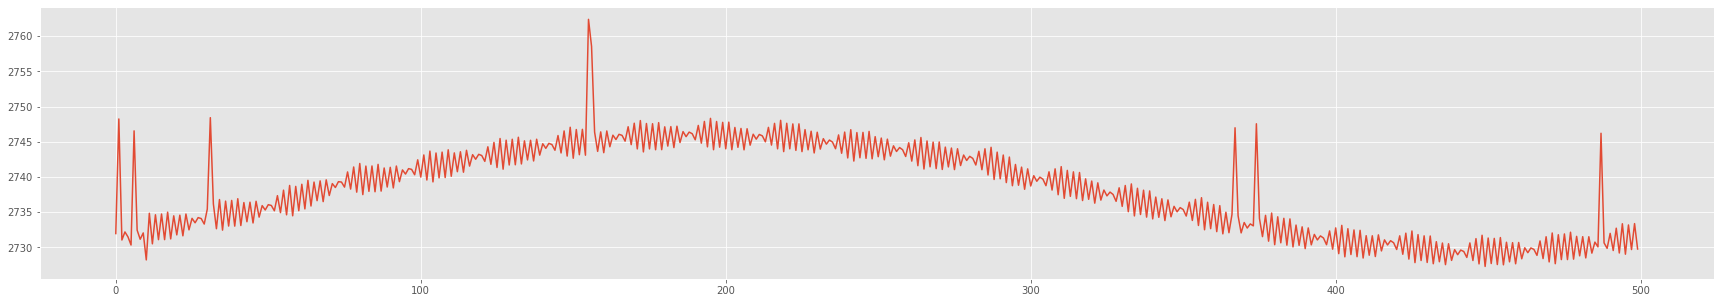

dataset.shape (17278, 3)
final_data.shape (17278, 2)


In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
plt.style.use('ggplot')
np.random.seed(100)

k = 1#每一侧近邻数量
c = 5#聚类类别个数

def my_plot(data):
  plt.figure(figsize=(30,5))
  plt.plot(data)
  plt.show()


def read_data():
  data = pd.read_csv('17280.csv', encoding="unicode_escape")
  print('Sahpe of Original Data:',data.shape)
  data = data.iloc[:,-2]
  data = data.values
  return data

def construct_dataset(data):
  data_length=data.shape[0]
  dataset=[]
  for i in range(data_length -2*k) :
    dataset.append(data[i:i+2*k+1])
  dataset=np.array(dataset)
  print('dataset.shape',dataset.shape)
  return dataset

def feature_engineering(dataset):
  final_data = [[abs(row[1]-row[2]),abs(row[1]-row[0])] for row in dataset]#[abs(row[1]-row[2]), abs(row[1]-row[0])]
  final_data=np.array(final_data)
  print('final_data.shape',final_data.shape)
  return final_data

data = read_data()
my_plot(data[:500])
dataset = construct_dataset(data)
final_data = feature_engineering(dataset)

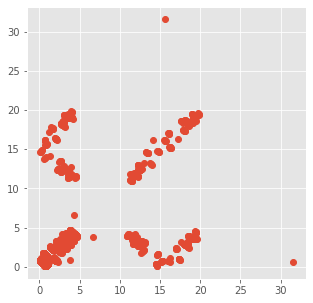

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(final_data[:,0], final_data[:,1],'o')
plt.show()

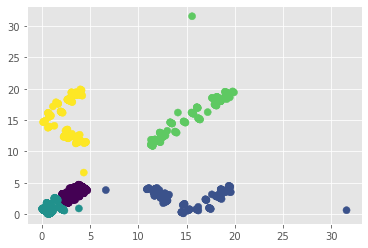

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=c).fit(final_data) #指定聚类中心个数为5
labels = gmm.predict(final_data)
plt.scatter(final_data[:,0], final_data[:,1], c=labels, s=50, cmap='viridis')

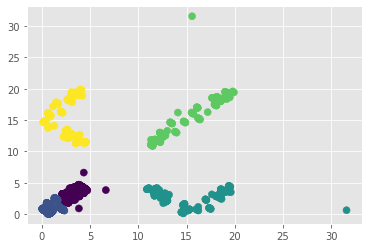

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=c, random_state=1).fit(final_data)
labels = kmeans_model.labels_
plt.scatter(final_data[:,0], final_data[:,1], c=labels, s=50, cmap='viridis')
plt.show()

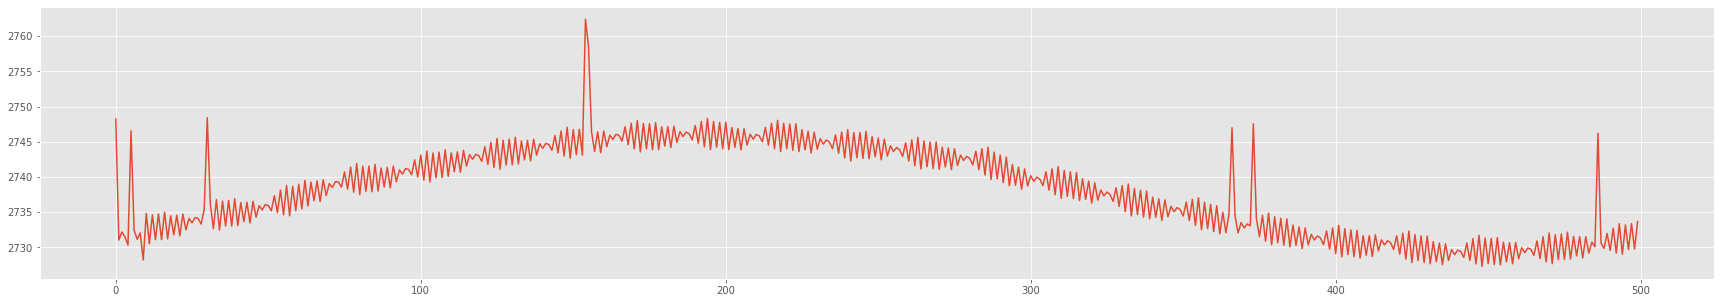

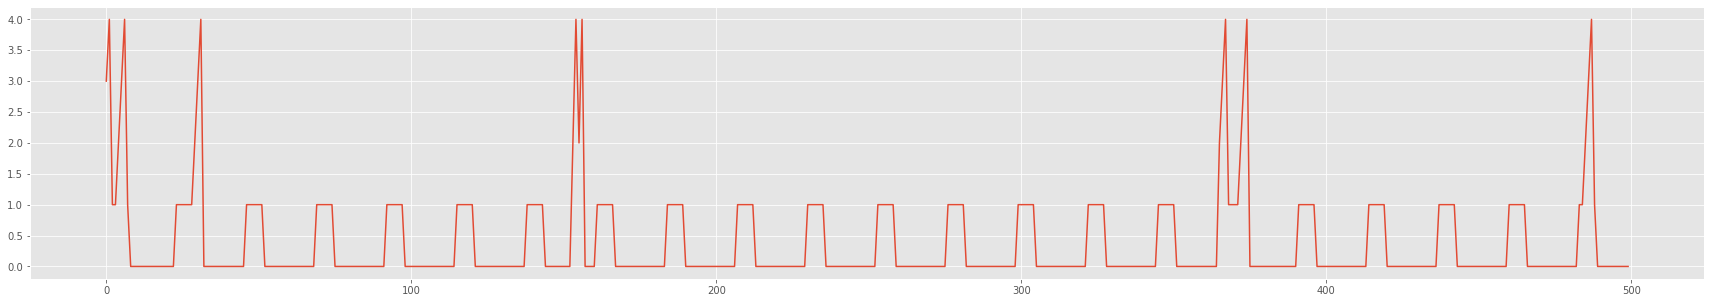

In [ ]:
deleted_data = data[k:-k]
my_plot(deleted_data[:500])
my_plot(labels[:500])

In [ ]:
record = []
record_original = []
for i in range(len(labels)):
  if labels[i]==3:
    record.append([i, deleted_data[i]])
  record_original.append([i, deleted_data[i]])
record = np.array(record)
record_original = np.array(record_original)
print(record.shape, record_original.shape)

(149, 2) (17278, 2)


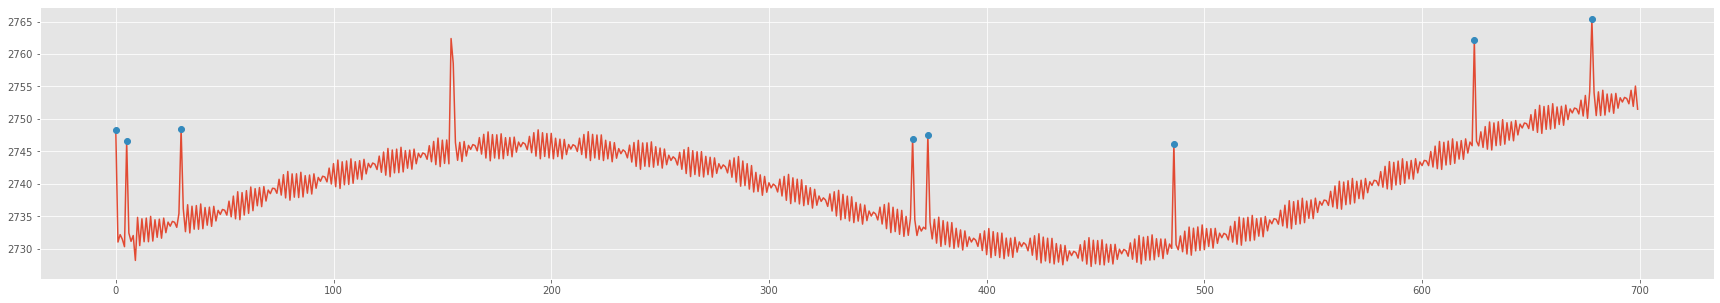

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(record_original[:700, 0], record_original[:700, 1])
plt.plot(record[:8, 0], record[:8, 1], 'o')
plt.show()

In [ ]:
pred = np.array([int(inst==3) for inst in labels])
output = np.vstack([deleted_data,pred])
output = output.T#np.reshape(output, (output.shape[1], output.shape[0]))
output = pd.DataFrame(output)
display(output)
output.to_csv('output.csv')

,0,1
0,2748.234047,1.0
1,2731.046706,0.0
2,2732.192524,0.0
3,2731.485643,0.0
4,2730.335024,0.0
...,...,...
17273,2740.556278,0.0
17274,2742.212675,0.0
17275,2741.610577,0.0
17276,2742.379870,0.0


In [ ]:
def read_label():
  label = pd.read_csv('17280.csv', encoding="unicode_escape").iloc[:, -1]
  print('Sahpe of Original label:',label.shape)
  label = label.values
  return label
label = read_label()
delete_label = label[k:-k]
print("精确度等指标：")
print(metrics.classification_report(delete_label,pred))
print("混淆矩阵：")
print(metrics.confusion_matrix(delete_label,pred))

精确度等指标：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17109
           1       0.99      0.88      0.93       169

    accuracy                           1.00     17278
   macro avg       1.00      0.94      0.97     17278
weighted avg       1.00      1.00      1.00     17278

混淆矩阵：
[[17108     1]
 [   21   148]]
